<a href="https://colab.research.google.com/github/marlenebauer/Deep_learning/blob/main/Data_exploration_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load libaries
import os
import shutil
import glob
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Set the path to the folder containing the mask and raster files
mask_folder = '/content/drive/MyDrive/deep_learning_project/Training_tiles_filtered_zero/maks_filtered_zero'
raster_folder = '/content/drive/MyDrive/deep_learning_project/Training_tiles_filtered_zero/rasters_filtered_zero'

In [ ]:
# Get all files
mask_files = sorted(glob.glob(mask_folder + '/*.npy'))
print(f"Total number of masks: {len(mask_files)}")
raster_files = sorted(glob.glob(raster_folder + '/*.npy'))
print(f"Total number of rasters: {len(raster_files)}")

Total number of masks: 8260
Total number of rasters: 8260


## Analyze the data

In [ ]:
# check the sum and percentages parking lot pixels in each mask
# Initialize dictionary
px_dict = {}
# Loop over all mask files
for mask_file in mask_files:
    mask = np.load(mask_file, mmap_mode='r')  # Use memory mapping
    sum_mask = np.sum(mask) # calculate sum of parking lot pixels (1's)
    px_dict[mask_file ] = [sum_mask, sum_mask/mask.size] # calculate percentage

# Check if the dictionary was filled correctly
print(f"Dictionary size: {len(px_dict)}")
print(f"Example entry: {list(px_dict.items())[0]}")

Dictionary size: 8260
Example entry: ('/content/drive/MyDrive/maks_filtered_new_try/32562_5513_mask_tile_0_1650.npy', [388, 0.023681640625])


### View masks and matching rasters

In [ ]:
# Plot one mask depending on pixel sum of 1s
# choose pixel sum
px_sum = 945 # adjust as you like

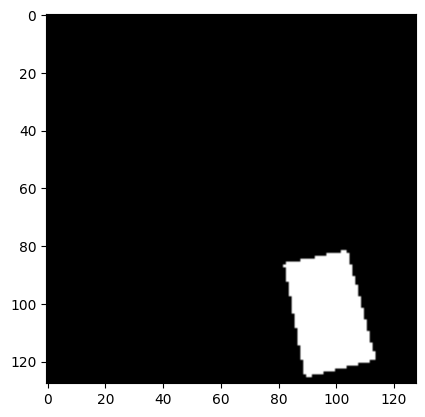

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot mask
mask_file_example_px_sum = [k for k, v in px_dict.items() if v[0] == px_sum][0] # select mask
mask_file_example = np.load(mask_file_example_px_sum, mmap_mode='r') # load
plt.imshow(mask_file_example, cmap='gray')
plt.show()
plt.clf()

In [ ]:
# Construct the corresponding raster file name
raster_file_example = mask_file_example_px_sum.replace("mask", "raster")
raster_filename_only = os.path.basename(raster_file_example) # only get the filename, excluding the path
raster_file_path = os.path.join(raster_folder, raster_filename_only)

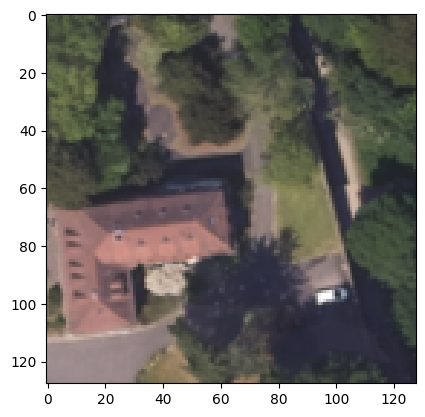

In [ ]:
# plot corresponding raster
raster_example = np.load(raster_file_path, mmap_mode='r') # load
raster_example_transp = np.transpose(raster_example, (1,2,0)) # transpose in order to plot
plt.imshow(raster_example_transp, interpolation='nearest')
plt.show()

### Check the frequency of 1s for each mask

In [ ]:
# View the results
# extract the sums and percentage for 1s of each mask
px_values = [value[0] for value in px_dict.values()]
percentage = [value[1] for value in px_dict.values()]

In [ ]:
# See the frequency and distribution of the pixel sum values in the data
distribution = Counter(px_values)
# sort for better overview
sorted_distribution = dict(sorted(distribution.items()))
print(sorted_distribution)
# e.g. we have 33 masks, that contain one parking lot pixel

{1: 33, 2: 18, 3: 13, 4: 28, 5: 10, 6: 13, 7: 11, 8: 7, 9: 10, 10: 7, 11: 10, 12: 7, 13: 7, 14: 13, 15: 11, 16: 12, 17: 6, 18: 11, 19: 5, 20: 8, 21: 5, 22: 7, 24: 7, 25: 9, 26: 14, 27: 5, 28: 6, 29: 5, 30: 11, 31: 1, 32: 7, 33: 4, 34: 7, 35: 6, 36: 4, 37: 6, 38: 6, 39: 7, 40: 11, 41: 7, 42: 12, 43: 9, 44: 7, 45: 6, 46: 3, 47: 2, 48: 8, 49: 4, 50: 8, 51: 5, 52: 7, 53: 5, 54: 3, 55: 6, 56: 11, 57: 2, 58: 4, 59: 8, 60: 4, 61: 8, 62: 9, 63: 10, 64: 3, 65: 6, 67: 5, 68: 5, 69: 6, 70: 3, 71: 4, 72: 4, 73: 2, 74: 4, 75: 7, 76: 5, 77: 7, 78: 2, 79: 1, 80: 6, 81: 3, 82: 1, 83: 3, 84: 7, 85: 5, 86: 2, 87: 1, 88: 6, 89: 5, 90: 2, 91: 4, 93: 6, 94: 5, 95: 6, 96: 4, 97: 4, 98: 4, 99: 2, 100: 2, 101: 1, 102: 5, 103: 7, 104: 6, 105: 3, 106: 11, 107: 7, 108: 3, 109: 7, 111: 6, 112: 3, 113: 4, 114: 6, 115: 5, 116: 6, 117: 25, 118: 1, 119: 2, 120: 6, 121: 10, 122: 1, 123: 4, 124: 3, 126: 3, 127: 2, 128: 8, 129: 14, 130: 4, 131: 7, 132: 3, 133: 4, 134: 3, 135: 2, 136: 2, 137: 5, 138: 10, 139: 11, 140: 10

In [ ]:
# Extract the sums (unique sum values) and their corresponding frequencies from the distribution
sums = list(distribution.keys())  # 'sums' will contain the unique sum of 1's in the masks
frequencies = list(distribution.values())  # 'frequencies' will contain how often each sum value appears

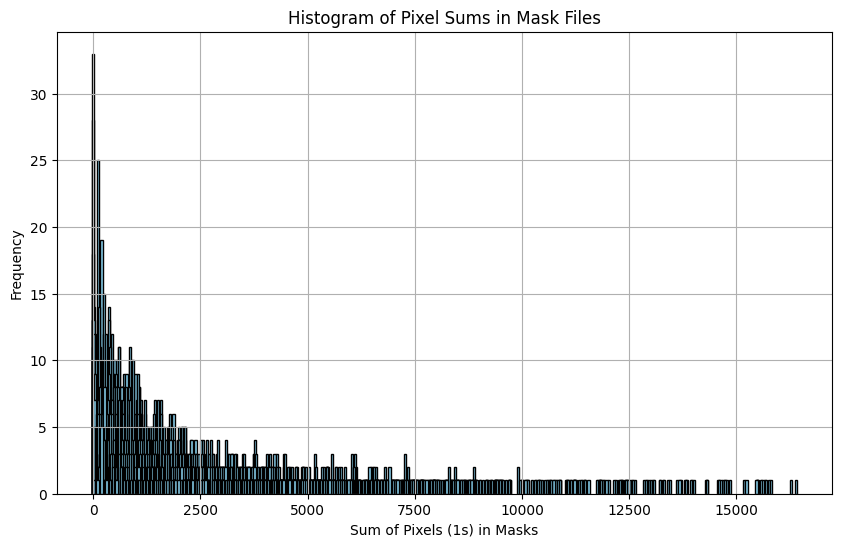

In [ ]:
# Plot the frequency
plt.figure(figsize=(10, 6))  # Create a figure with a specified size (10 inches by 6 inches)
plt.bar(sums, frequencies, width=50, color='skyblue', edgecolor='black')  # Bar plot of sums vs frequencies
plt.title('Histogram of Pixel Sums in Mask Files')  # Set the title of the plot
plt.xlabel('Sum of Pixels (1s) in Masks')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Enable gridlines for better readability
plt.show()  # Display the plot

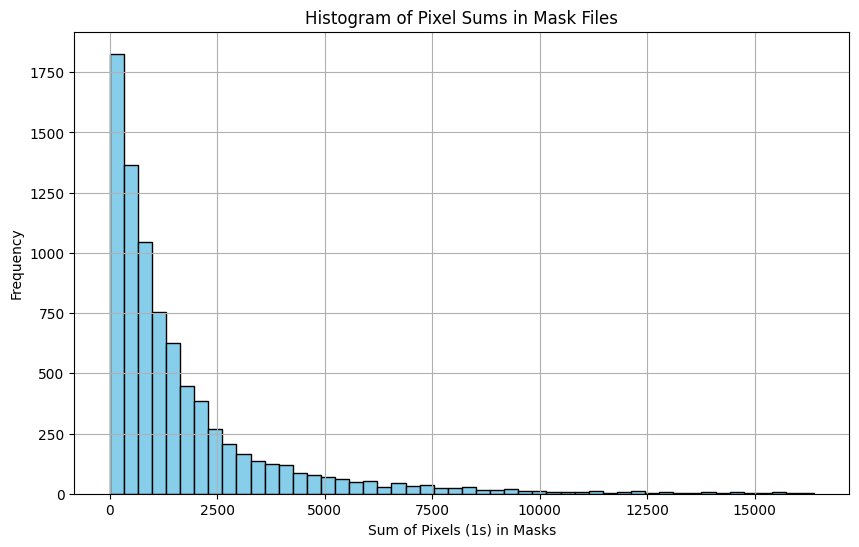

In [ ]:
# Directly plot the histogram of px_values
plt.figure(figsize=(10, 6))
plt.hist(px_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Pixel Sums in Mask Files')
plt.xlabel('Sum of Pixels (1s) in Masks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Even though we filtered out all masks that don't contain parking lot pixels (for details, see data_preparation_final.py), we still have a lot of masks that have only a few parking lot pixels.\
Therefore, we assigned class weights to deal with these imbalanced dataset using the [Inverse Class Frequency Method](https://medium.com/@ravi.abhinav4/improving-class-imbalance-with-class-weights-in-machine-learning-af072fdd4aa4)

**Formular for binary classification** \
weight_1 = total_samples / (2 * class_1_samples)\
weight_0 = total_samples / (2 * class_0_samples)


## Calculate class weights for the dataset
(masks and rasters above zero)

In [ ]:
# calculate the total sum of all pixels as well as for all pixels of 1s and 0s in the data
total_pixels = 128*128*8260
total_count_1s = sum(px_values)
total_count_0s = total_pixels - total_count_1s

In [ ]:
print("total number of pixels: ", total_pixels)
print("total number of 1 pixels: ", total_count_1s)
print("total number of 0 pixels: ", total_count_0s)

total number of pixels:  135331840
total number of 1 pixels:  14005932
total number of 0 pixels:  121325908


In [ ]:
# calculate the percentage of 0s and 1s pixel in the data
print("percentage 0 pixels: ", (total_pixels-total_count_1s)/total_pixels) # 0.896506749631129
print("percentage 1 pixels: ", (1- ((total_pixels-total_count_1s)/total_pixels))) # 0.10349325036887103

percentage 0 pixels:  0.896506749631129
percentage 1 pixels:  0.10349325036887103


In [ ]:
# calculate class weights inversely proportional to class frequencies
weights_0 = total_pixels/(2*total_count_0s)
weights_1 = total_pixels/(2*total_count_1s)
print("weight class 0: ", weights_0)
print("weight class 1: ", weights_1)
# weight 0 will be 0.558
# weight 1 will be 4.83

weight class 0:  0.5577202851018432
weight class 1:  4.831232937586731


## Calculate weights for the tiles above median (testing)

In [ ]:
# load them
filtered_masks_above_median_path = '/content/drive/MyDrive/deep_learning_project/Training_tiles_filtered_median_new/masks_filtered_median_testing'
filtered_rasters_above_median_path = '/content/drive/MyDrive/deep_learning_project/Training_tiles_filtered_median_new/rasters_filtered_median_testing'

In [ ]:
# Get all files
mask_files_above_median = sorted(glob.glob(filtered_masks_above_median_path + '/*.npy'))
print(f"Total number of masks: {len(mask_files_above_median)}")
raster_files_above_median = sorted(glob.glob(filtered_rasters_above_median_path + '/*.npy'))
print(f"Total number of rasters: {len(raster_files_above_median)}")

Total number of masks: 4129
Total number of rasters: 4129


In [ ]:
# check pixel sums of 1s and 0s for the masks above median
px_dict_above_median = {}
# Loop over all mask files
for mask_file in mask_files_above_median:
    mask = np.load(mask_file, mmap_mode='r')  # Use memory mapping
    sum_mask = np.sum(mask)
    px_dict_above_median[mask_file ] = [sum_mask, sum_mask/mask.size]

# Check if the dictionary was filled correctly
print(f"Dictionary size: {len(px_dict_above_median)}")
print(f"Example entry: {list(px_dict_above_median.items())[0]}")

Dictionary size: 4129
Example entry: ('/content/drive/MyDrive/masks_above_median/32562_5513_mask_tile_0_1700.npy', [1567, 0.09564208984375])


In [ ]:
# get the pixel values
px_values_median = [value[0] for value in px_dict_above_median.values()]

In [ ]:
# calculate total pixel sum, pixel sum for 1s and 0s
total_pixels_median = 128*128*4129
total_count_1s_median = sum(px_values_median)
total_count_0s_median = total_pixels_median - total_count_1s_median

In [ ]:
print("total number of pixels in masks above median: ", total_pixels_median)
print("total number of 1 pixels in masks above median: ", total_count_1s_median)
print("total number of 0 pixels in masks above median: ", total_count_0s_median)

total number of pixels in masks above median:  67649536
total number of 1 pixels in masks above median:  12326514
total number of 0 pixels in masks above median:  55323022


## Calculate class weights for whole training set

In [ ]:
### Calculate the weights for our training data
# training data will be our masks and rasters (above zero) doubled, plus our masks and rasters with pixel sum of 1s above the median
# get the total number of these pixels
total_pixels_all = (2*total_pixels) + total_pixels_median
print(total_pixels_all)

338313216


In [ ]:
# get the total number of 1 pixels
total_pixels_all_1 = total_count_1s_median + (2*total_count_1s)
print(total_pixels_all_1)

40338378


In [ ]:
# weights
weight_class_1_all = total_pixels_all/(2*total_pixels_all_1)
print(weight_class_1_all) # 4.193
weight_class_0_all = total_pixels_all/(2*(total_pixels_all-total_pixels_all_1))
print(weight_class_0_all) # 0.568

4.193440995570025
0.5676875575648438
